In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA 

In [8]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Drought_dataset_Chuadanga.csv")
df.head(10)

,Station,Year,Month,Temperature,Rainfall
0,Chuadanga,1994,1,18.80,9.00
1,Chuadanga,1994,2,24.80,15.44
2,Chuadanga,1994,3,28.90,35.33
3,Chuadanga,1994,4,32.90,47.11
4,Chuadanga,1994,5,34.70,119.11
5,Chuadanga,1994,6,31.00,225.78
6,Chuadanga,1994,7,30.25,366.89
7,Chuadanga,1994,8,30.80,209.56
8,Chuadanga,1994,9,30.25,321.44
9,Chuadanga,1994,10,29.30,186.67


In [9]:
df.drop(df[(df['Month']==2) & (df['Year']%4!=0)].index,inplace=True)
df.drop(df[(df['Month']==2) & (df['Year']%4==0)].index,inplace=True)
df.drop(df[((df['Month']==4)|(df['Month']==6)|(df['Month']==9)|(df['Month']==11))].index,inplace=True)

In [10]:
df.size

945

<AxesSubplot:xlabel='Year'>

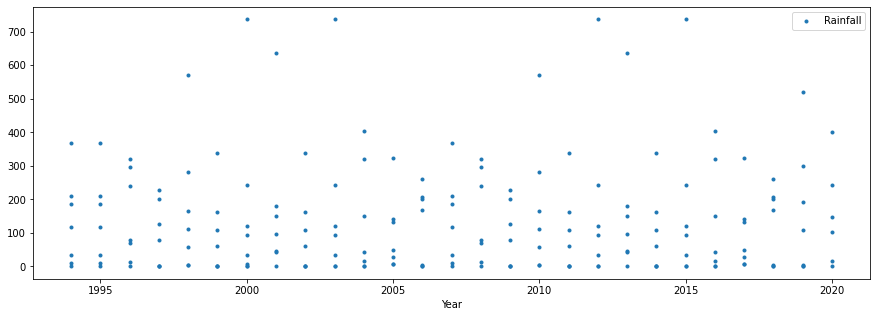

In [11]:
df.plot(x='Year',y='Rainfall',style='.', figsize=(15,5))

<AxesSubplot:xlabel='Year'>

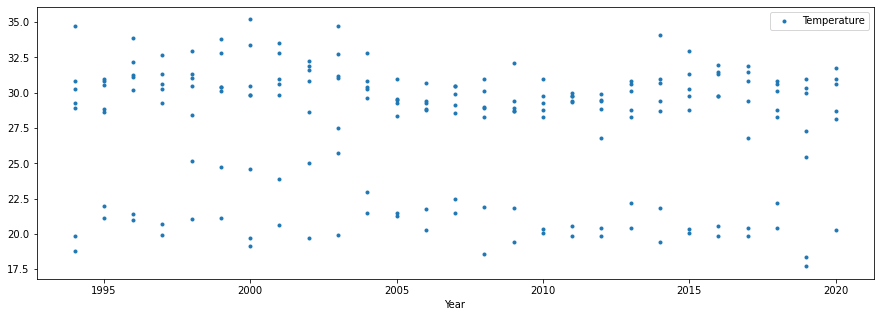

In [12]:
df.plot(x='Year',y='Temperature',style='.', figsize=(15,5))

In [13]:
train = df.loc[df['Year'] <= 2020]
test = df.loc[df['Year'] == 2020]
train=train[train['Station']=='Chuadanga']
test=test[test['Station']=='Chuadanga']

In [14]:
train.size

945

In [15]:
X_train=train.drop(['Station', 'Temperature'],axis=1)
Y_train=train['Rainfall']

In [16]:
X_test=test.drop(['Station','Temperature'],axis=1)
Y_test=test['Rainfall']

In [17]:
from sklearn.svm import SVR
regressor=SVR(gamma='scale',kernel='linear')
regressor.fit(X_train,Y_train)
Y_pred = regressor.predict(X_test)

In [18]:
df1 = pd.DataFrame({'Actual Rainfall': Y_test, 'Predicted Rainfall': Y_pred})  
df1[df1['Predicted Rainfall']>=1].head(10)

,Actual Rainfall,Predicted Rainfall
314,15.0,15.096050
316,147.0,147.060224
318,401.0,400.991296
319,243.0,243.034159
321,104.0,104.071860
323,2.0,2.099522


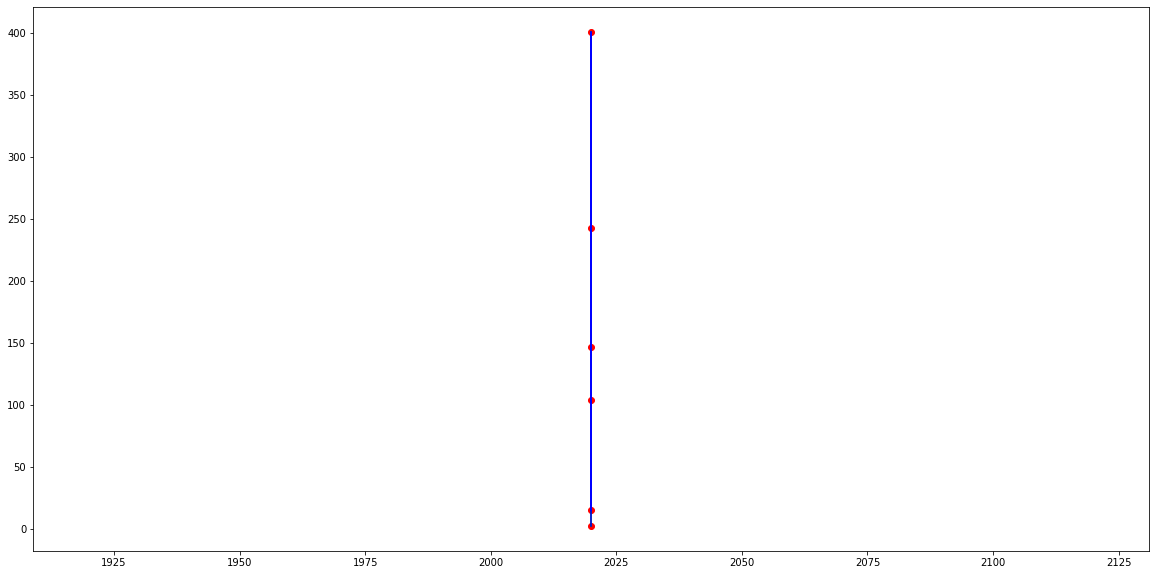

In [21]:
plt.figure(figsize=(20,10))
plt.scatter(X_test['Year'],Y_test,color='red')
plt.plot(X_test['Year'],Y_test,color='green')
plt.plot(X_test['Year'],Y_pred,color='blue')

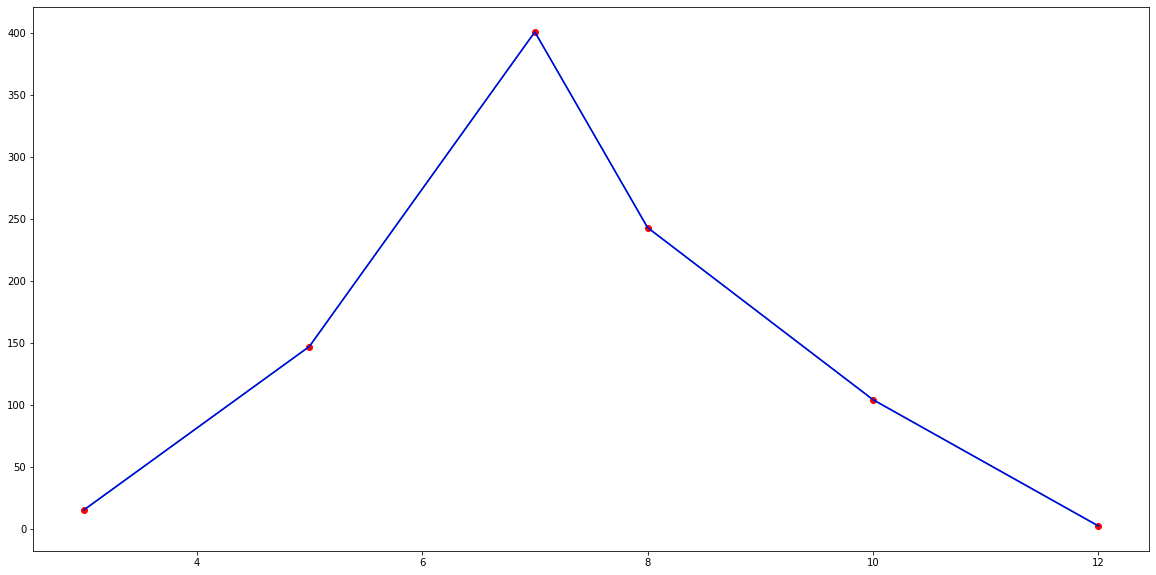

In [24]:
plt.figure(figsize=(20,10))
plt.scatter(X_test['Month'],Y_test,color='red')
plt.plot(X_test['Month'],Y_test,color='green')
plt.plot(X_test['Month'],Y_pred,color='blue')

In [25]:
X_train2=train.drop(['Station', 'Rainfall'],axis=1)
Y_train2=train['Temperature']

In [26]:
X_test2=test.drop(['Station', 'Rainfall'],axis=1)
Y_test2=test['Temperature']

In [27]:
from sklearn.svm import SVR
regressor=SVR(gamma='scale',kernel='linear')
regressor.fit(X_train2,Y_train2)
Y_pred2 = regressor.predict(X_test2)

In [28]:
df2 = pd.DataFrame({'Actual Temperature': Y_test2, 'Predicted Temperature': Y_pred2})  
df2[df2['Predicted Temperature']>=1].head(10)

,Actual Temperature,Predicted Temperature
314,28.12,28.092301
316,31.74,31.670004
318,30.60,30.545396
319,30.96,30.901821
321,28.73,28.700424
323,20.27,20.344532


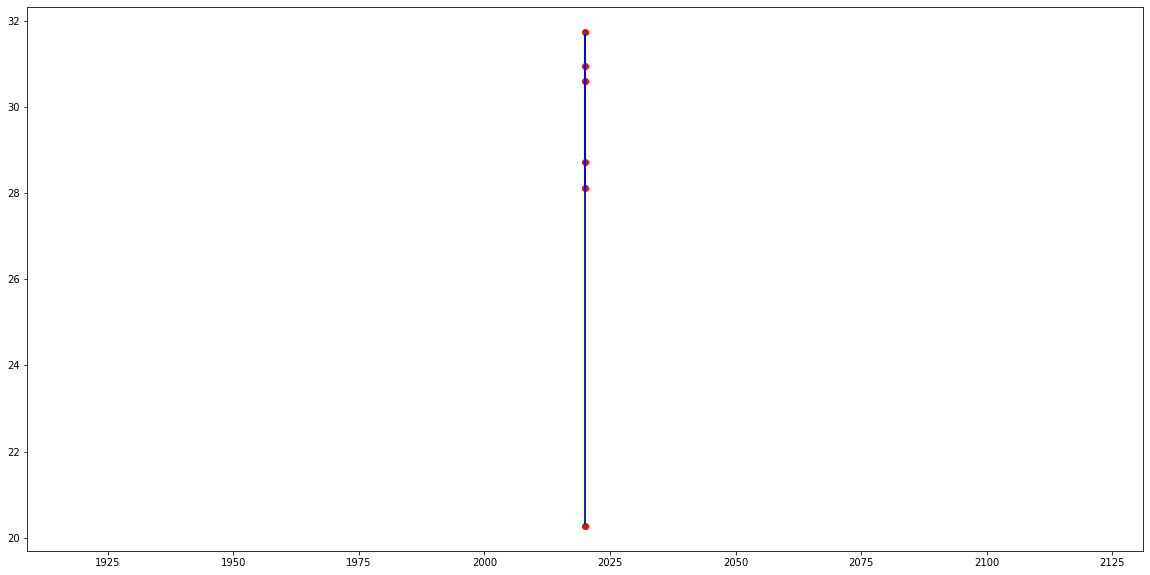

In [29]:
plt.figure(figsize=(20,10))
plt.scatter(X_test2['Year'],Y_test2,color='red')
plt.plot(X_test2['Year'],Y_test2,color='green')
plt.plot(X_test2['Year'],Y_pred2,color='blue')

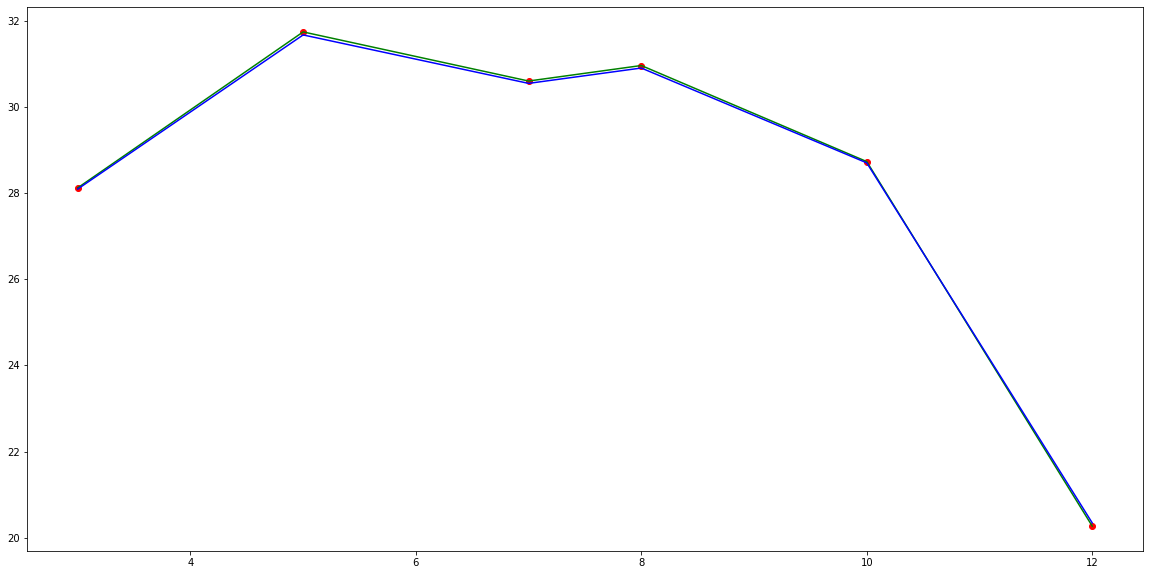

In [30]:
plt.figure(figsize=(20,10))
plt.scatter(X_test2['Month'],Y_test2,color='red')
plt.plot(X_test2['Month'],Y_test2,color='green')
plt.plot(X_test2['Month'],Y_pred2,color='blue')